<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_5sem/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0%D0%BA%D0%B8_4%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Численное решение нелинейных уравнений

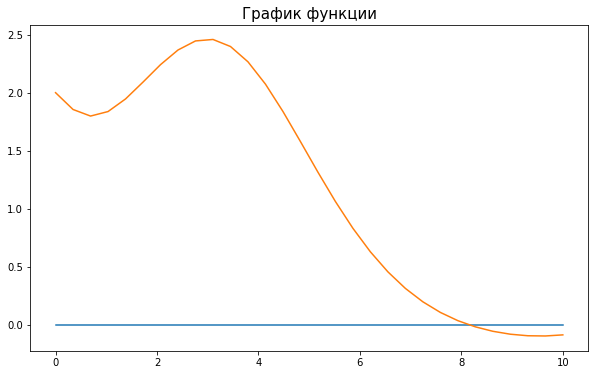

In [2]:
def function(x):
  return np.e**(np.sin(x/2)) - np.arctan(x) + 1
def deriv_function(x):
  return np.e**(np.sin(x/2))*np.cos(x/2)/2 - 1/(1+x**2)
  
N=30
START=0
FINISH=10
epsilon1 = 10**-3
epsilon2 = 10**-6
epsilon3 = 10**-9

start_x = np.linspace(START, FINISH, N)
start_y = function( start_x )

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.set_title("График функции", fontsize=15)
ax.plot([START,FINISH],[0,0])
ax.plot(start_x, start_y)

## Метод Дихотомии

In [3]:
a = 8
b = 8.5
delta = b-a

def Dihotomia(a,b,eps):
  assert function(b)*function(a) < 0, 'Метод не работает'
  N = 0
  delta = b-a

  while delta > eps:
    N+=1
    c = (a+b)/2
    if function(b)*function(c) > 0:
      b = c
    elif function(b)*function(c) == 0:
      delta = 0  
    else:
      a = c
    delta = abs(b-a)
    
  return c,N 

x1, N1 =  Dihotomia(a,b,epsilon1)
print("Искомый корень = ",x1)
print("\nКоличество операций = ", N1, ", Теоретическое N = ", int((np.log2( abs(delta/epsilon1) ))//1 + 1) )

Искомый корень =  8.1435546875

Количество операций =  9 , Теоретическое N =  9


## Метод Ньютона

In [4]:
a=7

def Newton(x,eps):
  N = 0
  while abs(function(x)) > eps:
    N+=1
    x -= function(x)/deriv_function(x)
  return x, N

x2, N2 =  Newton(a,epsilon1)
print("Искомый корень = ",x2)
print("\nКоличество операций = ", N2)

Искомый корень =  8.142186211591703

Количество операций =  3


## Метод Хорд с модификацией

In [5]:
a = 7
b = 8.5

def Hord_mod(a,b,eps):
  assert function(b)*function(a) < 0, 'Метод не работает'
  N = 0

  if function(a)>0:
    a,b = b,a

  x = a
  while abs(function(x)) > eps:
    N+=1
    x -= function(x)*(b-a)/(function(b)-function(a))
  return x, N

x3, N3 =  Hord_mod(a,b,epsilon1)
print("Искомый корень = ",x3)
print("\nКоличество операций = ", N3)

Искомый корень =  8.148104913576821

Количество операций =  4


## Метод Хорд

In [6]:
a = 7
b = 8.5

def Hord(x0,x1,eps):
  N = 0
  if deriv_function(x0) > 0:
    x0,x1 = x1,x0
  else:  
    while abs(function(x0)) > eps:
      N+=1
      x = x1- function(x1)*(x1-x0)/(function(x1)-function(x0))
      x0 = x1
      x1 = x
  return x, N

x3, N3 =  Hord(a,b,epsilon1)
print("Искомый корень = ",x3)
print("\nКоличество операций = ", N3)

Искомый корень =  8.143178880306314

Количество операций =  4


## Зависимость кол-ва операций от точноси

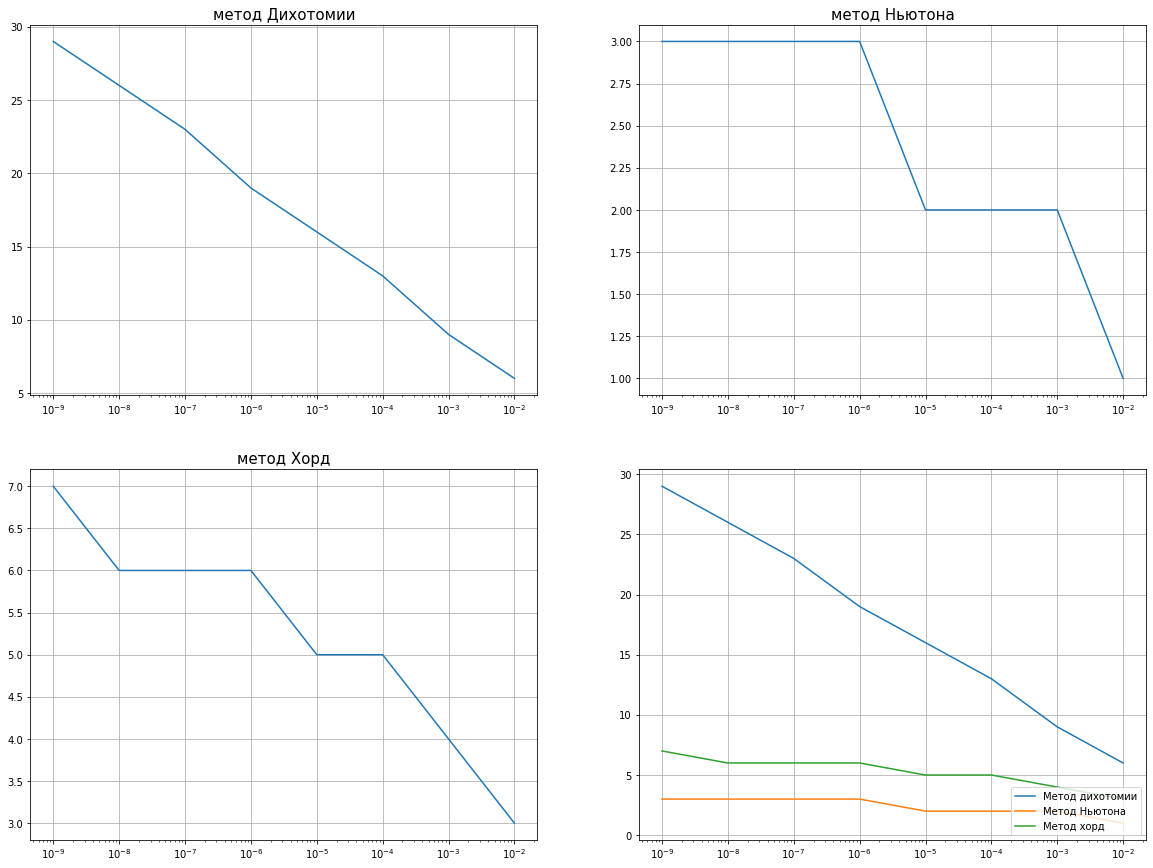

In [7]:
ax_x = [10**-2,10**-3,10**-4,10**-5,10**-6,10**-7,10**-8,10**-9]
step_y1 = []
step_y2 = []
step_y3 = []
step_y4 = []

for eps in ax_x:
  step_y1.append(Dihotomia(8,8.5,eps)[1] )
  step_y2.append(Newton(8,eps)[1] )
  step_y3.append(Hord(7,8.5,eps)[1] )
  step_y4.append(Hord_mod(7,8.5,eps)[1] )

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(2,2,1)
ax.set_title("метод Дихотомии", fontsize=15)
ax.plot( ax_x, step_y1)
plt.grid(True)
plt.xscale('log')

ax = fig.add_subplot(2,2,2)
ax.set_title("метод Ньютона", fontsize=15)
ax.plot( ax_x, step_y2)
plt.grid(True)
plt.xscale('log')

ax = fig.add_subplot(2,2,3)
ax.set_title("метод Хорд", fontsize=15)
ax.plot( ax_x, step_y3)
plt.grid(True)
plt.xscale('log')

# ax = fig.add_subplot(2,2,4)
# ax.set_title("метод Хорд с модификацией", fontsize=15)
# ax.plot( ax_x, step_y4)
# plt.grid(True)
# plt.xscale('log')
# ax.plot( ax_x, step_y4, label = "Метод хорд с модификацией")

ax = fig.add_subplot(2,2,4)
ax.plot( ax_x, step_y1, label = "Метод дихотомии")
ax.plot( ax_x, step_y2, label = "Метод Ньютона")
ax.plot( ax_x, step_y3, label = "Метод хорд")
plt.grid(True)
plt.xscale('log')
ax.legend(loc='lower right')

## Скорость сходимости

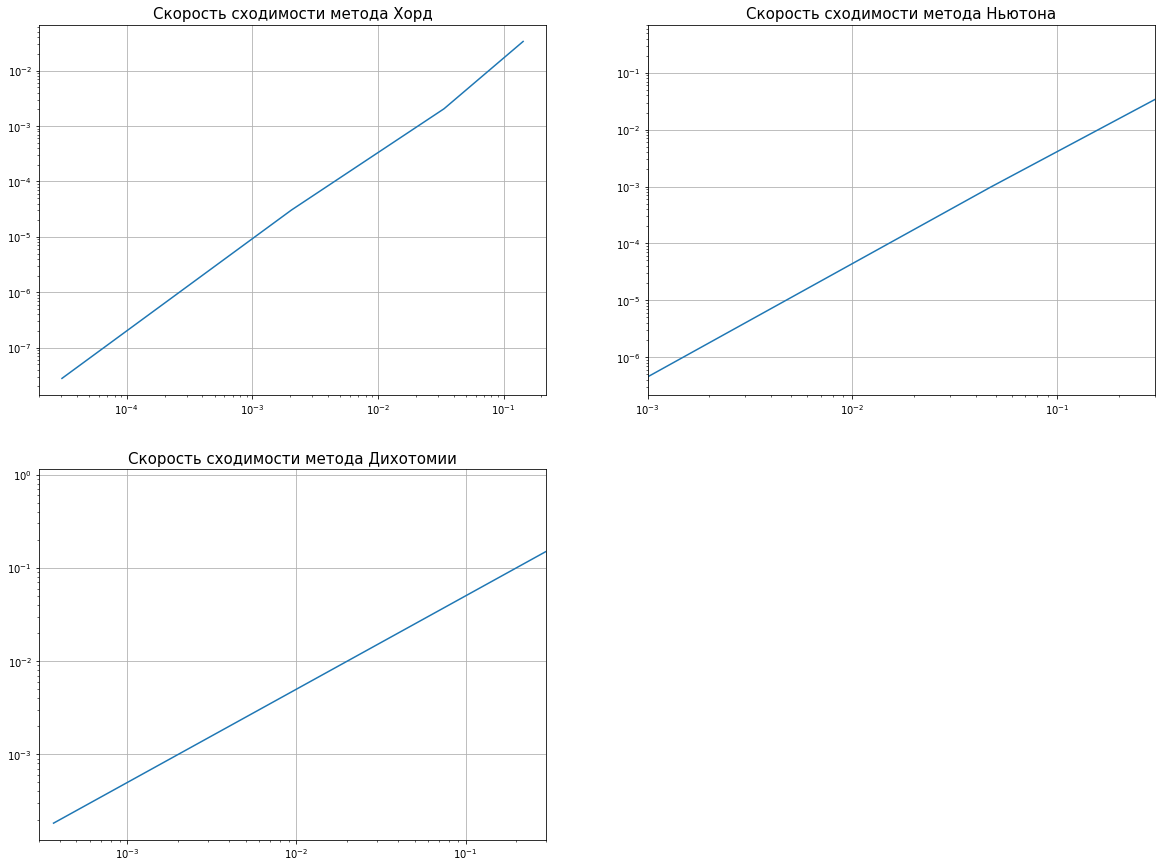

In [8]:
a = 7.8
b = 8.5

#---------------------Метод хорд с модификацией------------------------------
axis_x1 = []
axis_y1 = []

if function(a)>0:
  a,b = b,a
x = []
x.append(a)
while abs(function(x[-1])) > 10**-8:
  x.append( x[-1] - function(x[-1])*(b-a)/(function(b)-function(a)) )

for i in range(1,len(x)-1):
  axis_x1.append( abs( x[i-1] - x[-1] ) )
  axis_y1.append( abs( x[i] - x[-1] ) )

#---------------------Метод хорд------------------------------------------
axis_x4 = []
axis_y4 = []
x0 = 7.5
x1 = 8
N=0

x4 = []
x4.append(x1)
if deriv_function(x0) > 0:
    x0,x1 = x1,x0
else:    
  while abs(function(x4[-1])) > epsilon3:
      N+=1
      x4.append( x1- function(x1)*(x1-x0)/(function(x1)-function(x0)) )  
      x0 = x1
      x1 = x4[-1]

for i in range(1,len(x4)-1):
  axis_x4.append( abs( x4[i-1] - x4[-1] ) )
  axis_y4.append( abs( x4[i] - x4[-1] ) )
#---------------------Метод Ньютона------------------------------
a = 7
axis_x2 = []
axis_y2 = []
x2 = []
x2.append(a)

while abs(function(x2[-1])) > epsilon3:
    x2.append( x2[-1] - function(x2[-1])/deriv_function(x2[-1]) )

for i in range(1,len(x2)-1):
  axis_x2.append( abs( x2[i-1] - x2[-1] ) )
  axis_y2.append( abs( x2[i] - x2[-1] ) )

#---------------------Метод Дихотомии------------------------------
a = 7
b = 8.5
delta = []
delta.append(abs(b-a))
c = (a+b)/2 

axis_x3 = []
axis_y3 = []

while delta[-1] > 10**-4:
  if function(b)*function(c) > 0:
    b = c
  else:
    a = c
  c = (a+b)/2
  delta.append( abs(b-a) )

for i in range(1,len(delta)-1):
  axis_x3.append( delta[i-1]  )
  axis_y3.append( delta[i] ) 

#-------------------------------------------------------------
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(2,2,1)
ax.set_title("Скорость сходимости метода Хорд", fontsize=15)
ax.plot( axis_x4, axis_y4)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
# 1.5

# ax = fig.add_subplot(2,2,4)
# ax.set_title("Скорость сходимости метода Хорд с модификацией", fontsize=15)
# ax.plot( axis_x1, axis_y1)
# plt.grid(True)
# plt.yscale('log')
# plt.xscale('log')
# 1.5

ax = fig.add_subplot(2,2,2)
ax.set_title("Скорость сходимости метода Ньютона", fontsize=15)
ax.plot( axis_x2, axis_y2)
ax.set(xlim=(10**-3, 3*10**-1))
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
# 2

ax = fig.add_subplot(2,2,3)
ax.set_title("Скорость сходимости метода Дихотомии", fontsize=15)
ax.plot( axis_x3, axis_y3)
ax.set(xlim=(3*10**-4, 3*10**-1))
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
# 1
